## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [9]:
def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i,n in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n, activation="relu", name="H_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n, activation="relu", name="H_layer"+str(i+1))(x)
    out = keras.layers.Dense(units=output_units,activation="softmax", name="output")(x)
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    return model

In [12]:
LEARNING_RATE = 0.01
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.95,0.85,0.75,0.65,0.55]

In [13]:
results = {}
for mo in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (mo))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=mo)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-mo-%s" % str(mo)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.950000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
H_layer1 (Dense)             (None, 512)               1573376   
_________________________________________________________________
H_layer2 (Dense)             (None, 256)               131328    
_________________________________________________________________
H_layer3 (Dense)             (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.8932 - acc: 0.3191 - val_loss: 1.9080 - val_acc: 0.3229
Epoch 2/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.6857 - acc: 0.4014 - val_loss: 1.6793 - val_acc: 0.4093
Epoch 3/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.5967 - acc: 0.4333 - val_loss: 1.6269 - val_acc: 0.4264
Epoch 4/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.5319 - acc: 0.4563 - val_loss: 1.7739 - val_acc: 0.3982
Epoch 5/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.4900 - acc: 0.4738 - val_loss: 1.5569 - val_acc: 0.4370
Epoch 6/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4466 - acc: 0.4893 - val_loss: 1.5818 - val_acc: 0.4429
Epoch 7/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.4074 - acc: 0.5012 - val_loss: 1.4446 - val_acc

50000/50000 [==============================] - 2s 48us/step - loss: 1.7416 - acc: 0.3851 - val_loss: 1.7608 - val_acc: 0.3717
Epoch 3/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.6592 - acc: 0.4123 - val_loss: 1.6665 - val_acc: 0.4017
Epoch 4/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.6000 - acc: 0.4342 - val_loss: 1.6773 - val_acc: 0.4145
Epoch 5/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.5568 - acc: 0.4489 - val_loss: 1.5601 - val_acc: 0.4413
Epoch 6/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.5128 - acc: 0.4676 - val_loss: 1.8301 - val_acc: 0.3696
Epoch 7/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4822 - acc: 0.4758 - val_loss: 1.5464 - val_acc: 0.4423
Epoch 8/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4553 - acc: 0.4846 - val_loss: 1.5103 - val_acc: 0.4596
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 48us/step - loss: 1.6931 - acc: 0.4019 - val_loss: 1.6498 - val_acc: 0.4207
Epoch 4/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.6351 - acc: 0.4204 - val_loss: 1.6544 - val_acc: 0.4134
Epoch 5/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.5961 - acc: 0.4346 - val_loss: 1.6312 - val_acc: 0.4102
Epoch 6/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.5692 - acc: 0.4461 - val_loss: 1.5617 - val_acc: 0.4451
Epoch 7/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.5271 - acc: 0.4583 - val_loss: 1.5995 - val_acc: 0.4287
Epoch 8/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.5017 - acc: 0.4705 - val_loss: 1.5914 - val_acc: 0.4337
Epoch 9/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4744 - acc: 0.4794 - val_loss: 1.6553 - val_acc: 0.4239
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 2s 49us/step - loss: 1.6839 - acc: 0.4070 - val_loss: 1.7170 - val_acc: 0.3803
Epoch 5/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.6450 - acc: 0.4196 - val_loss: 1.6557 - val_acc: 0.4195
Epoch 6/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.6058 - acc: 0.4337 - val_loss: 1.7318 - val_acc: 0.3920
Epoch 7/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.5680 - acc: 0.4474 - val_loss: 1.5837 - val_acc: 0.4368
Epoch 8/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.5455 - acc: 0.4548 - val_loss: 1.5372 - val_acc: 0.4533
Epoch 9/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.5157 - acc: 0.4636 - val_loss: 1.5177 - val_acc: 0.4561
Epoch 10/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.4985 - acc: 0.4709 - val_loss: 1.5820 - val_acc: 0.4373
Epoch 11/50
50000/50000 [==========================

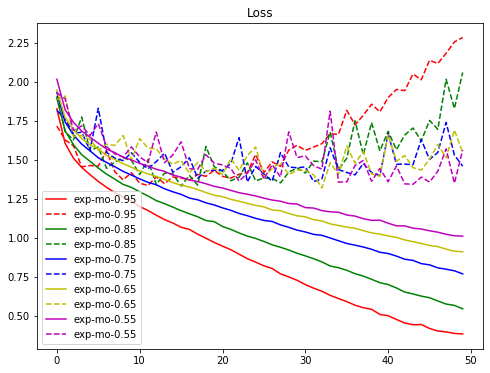

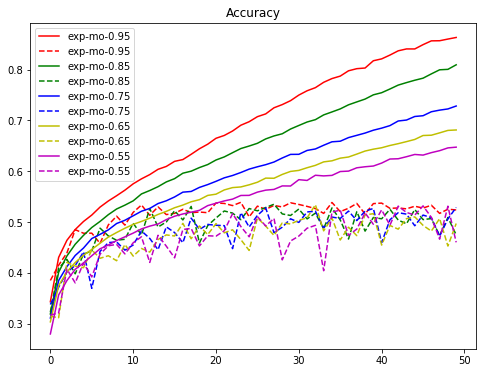

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# Turn off nesterov

In [15]:
results = {}
for mo in MOMENTUM:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with MOMENTUM = %.6f" % (mo))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=False, momentum=mo)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-mo-%s" % str(mo)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.950000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
H_layer1 (Dense)             (None, 512)               1573376   
_________________________________________________________________
H_layer2 (Dense)             (None, 256)               131328    
_________________________________________________________________
H_layer3 (Dense)             (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.9128 - acc: 0.3148 - val_loss: 1.7491 - val_acc: 0.3793
Epoch 2/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.6990 - acc: 0.3961 - val_loss: 1.6229 - val_acc: 0.4202
Epoch 3/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.6094 - acc: 0.4293 - val_loss: 1.5648 - val_acc: 0.4429
Epoch 4/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.5548 - acc: 0.4502 - val_loss: 1.5837 - val_acc: 0.4376
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.5114 - acc: 0.4638 - val_loss: 1.5627 - val_acc: 0.4429
Epoch 6/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4725 - acc: 0.4791 - val_loss: 1.4587 - val_acc: 0.4832
Epoch 7/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4319 - acc: 0.4897 - val_loss: 1.4872 - val_acc

50000/50000 [==============================] - 2s 47us/step - loss: 1.7397 - acc: 0.3817 - val_loss: 1.7923 - val_acc: 0.3719
Epoch 3/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.6540 - acc: 0.4139 - val_loss: 1.7837 - val_acc: 0.3735
Epoch 4/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.5969 - acc: 0.4339 - val_loss: 1.5803 - val_acc: 0.4380
Epoch 5/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.5467 - acc: 0.4525 - val_loss: 1.6021 - val_acc: 0.4340
Epoch 6/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.5098 - acc: 0.4674 - val_loss: 1.4836 - val_acc: 0.4714
Epoch 7/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4711 - acc: 0.4798 - val_loss: 1.5444 - val_acc: 0.4586
Epoch 8/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4480 - acc: 0.4862 - val_loss: 1.6554 - val_acc: 0.4260
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 46us/step - loss: 1.6853 - acc: 0.4041 - val_loss: 1.7069 - val_acc: 0.4017
Epoch 4/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.6327 - acc: 0.4251 - val_loss: 1.6165 - val_acc: 0.4286
Epoch 5/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5847 - acc: 0.4409 - val_loss: 1.5801 - val_acc: 0.4363
Epoch 6/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.5514 - acc: 0.4517 - val_loss: 1.6102 - val_acc: 0.4189
Epoch 7/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5190 - acc: 0.4627 - val_loss: 1.5172 - val_acc: 0.4613
Epoch 8/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4915 - acc: 0.4730 - val_loss: 1.5394 - val_acc: 0.4495
Epoch 9/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4598 - acc: 0.4834 - val_loss: 1.5226 - val_acc: 0.4579
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 2s 46us/step - loss: 1.6620 - acc: 0.4154 - val_loss: 1.7187 - val_acc: 0.3868
Epoch 5/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.6197 - acc: 0.4285 - val_loss: 1.6366 - val_acc: 0.4132
Epoch 6/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5857 - acc: 0.4394 - val_loss: 1.5884 - val_acc: 0.4345
Epoch 7/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.5506 - acc: 0.4544 - val_loss: 1.5535 - val_acc: 0.4459
Epoch 8/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.5254 - acc: 0.4597 - val_loss: 1.5462 - val_acc: 0.4507
Epoch 9/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.5018 - acc: 0.4693 - val_loss: 1.5216 - val_acc: 0.4575
Epoch 10/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4775 - acc: 0.4784 - val_loss: 1.5213 - val_acc: 0.4603
Epoch 11/50
50000/50000 [==========================

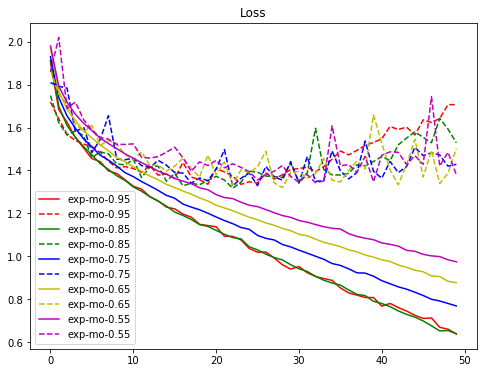

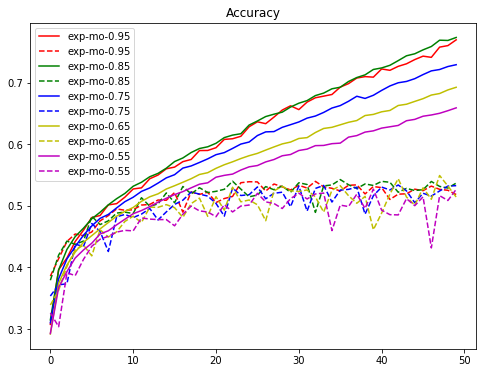

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()